In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

def buscar_archivo(nombre_archivo, directorio_inicial='C:\\'):
    for ruta_actual, directorios, archivos in os.walk(directorio_inicial):
        if nombre_archivo in archivos:
            return os.path.join(ruta_actual, nombre_archivo)
    return None


# Corregir la lectura del archivo CSV
archivo_csv = buscar_archivo("HousePrices.csv")
print(archivo_csv)
df = pd.read_csv(archivo_csv, engine='python',index_col=0) #skiprows=1,
print(df)

# Muestra de los primeros registros del DataFrame
print("Antes de la conversión:")
print(df.head())

# Convertir la columna 'driveway' a variables dummy
def Dummys (*args):
    for i in range(len(args)):
        df[args[i]] = df[args[i]].map({'yes': 1, 'no': 0}) #si es sí sera 1 y si es 
Dummys('driveway', 'recreation','fullbase','gasheat','aircon','prefer')
# Muestra de los primeros registros después de la conversión
print("\nDespués de la conversión:")
print(df.head())


C:\Users\maria\AppData\Local\Temp\ipykernel_22348\2503564821.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


C:\Users\maria\Desktop\Segundo_periodo\ANALISIS_MULT\HousePrices.csv
           price  lotsize  bedrooms  bathrooms  stories driveway recreation  \
rownames                                                                      
1          42000     5850         3          1        2      yes         no   
2          38500     4000         2          1        1      yes         no   
3          49500     3060         3          1        1      yes         no   
4          60500     6650         3          1        2      yes        yes   
5          61000     6360         2          1        1      yes         no   
...          ...      ...       ...        ...      ...      ...        ...   
542        91500     4800         3          2        4      yes        yes   
543        94000     6000         3          2        4      yes         no   
544       103000     6000         3          2        4      yes        yes   
545       105000     6000         3          2        2      y

In [20]:
cols_de_interes=['driveway', 'recreation','fullbase','gasheat','aircon','prefer']
df[cols_de_interes]
df

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer,Correlation_with_Price
rownames,,,,,,,,,,,,,
1,42000,5850,3,1,2,1,0,1,0,0,1,0,NaN
2,38500,4000,2,1,1,1,0,0,0,0,0,0,NaN
3,49500,3060,3,1,1,1,0,0,0,0,0,0,NaN
4,60500,6650,3,1,2,1,1,0,0,0,0,0,NaN
5,61000,6360,2,1,1,1,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,91500,4800,3,2,4,1,1,0,0,1,0,0,NaN
543,94000,6000,3,2,4,1,0,0,0,1,0,0,NaN
544,103000,6000,3,2,4,1,1,0,0,1,1,0,NaN


price                     68121.597070
lotsize                    5150.265568
bedrooms                      2.965201
bathrooms                     1.285714
stories                       1.807692
driveway                      0.858974
recreation                    0.177656
fullbase                      0.349817
gasheat                       0.045788
aircon                        0.316850
garage                        0.692308
prefer                        0.234432
Correlation_with_Price             NaN
dtype: float64
                            Varianza
price                   7.130326e+08
lotsize                 4.700912e+06
bedrooms                5.437410e-01
bathrooms               2.521625e-01
stories                 7.537756e-01
driveway                1.213597e-01
recreation              1.463622e-01
fullbase                2.278624e-01
gasheat                 4.377121e-02
aircon                  2.168532e-01
garage                  7.418490e-01
prefer                  1.798031e-

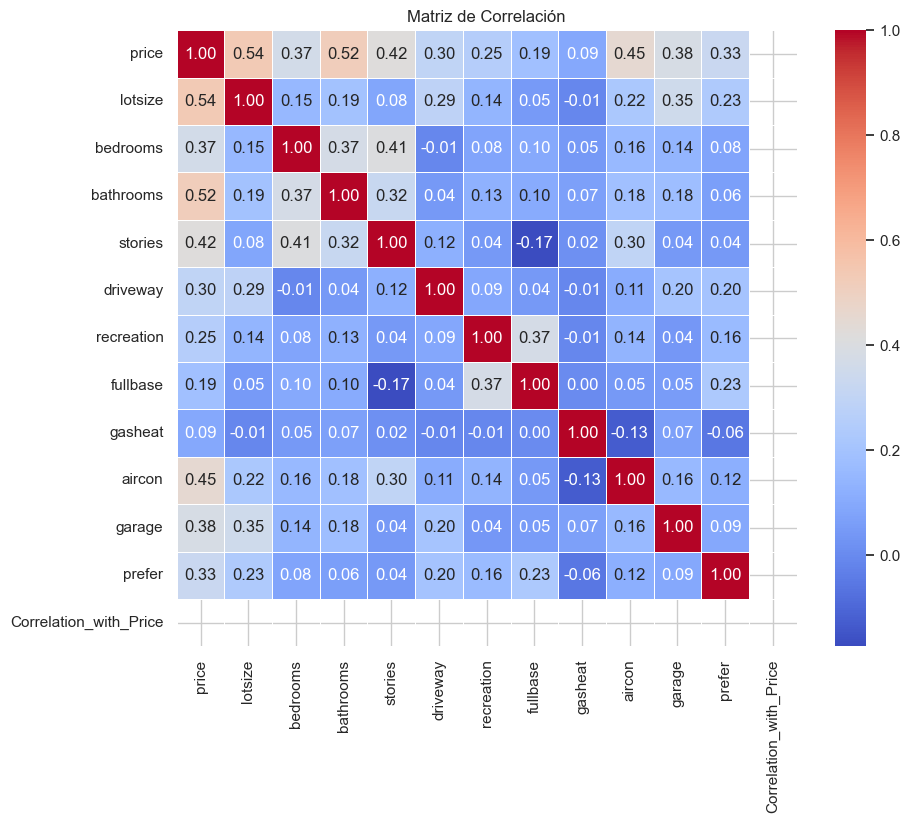

In [24]:
#Sacas promedios 
print(df.mean())

#Sacar la varianza de todos los datos
var = df.var()

# Crear un DataFrame a partir de la serie de varianzas
tabla_varianzas = pd.DataFrame(var, columns=['Varianza'])
print(tabla_varianzas)

#Sacar la matriz/vector de covarianza
cov = df.cov()
print(cov)

#Sacar la matriz correlacion 
cor_matrix = df.corr()
print(cor_matrix)

#Mostrar la intensidad de corretaciones de la matriz
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()


In [16]:
cov = df.cov()
cov


,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
price,7.130326e+08,3.102023e+07,7215.431824,6928.665793,9764.590261,2764.344907,2604.596485,2373.623779,518.642336,5637.258178,8815.633592,3726.037752
lotsize,3.102023e+07,4.700912e+06,242.776231,211.037746,157.509880,218.118255,116.398605,49.147296,-4.173650,223.906526,658.969936,215.851390
bedrooms,7.215432e+03,2.427762e+02,0.543741,0.138401,0.261186,-0.003082,0.022707,0.034214,0.007101,0.055083,0.088356,0.024687
bathrooms,6.928666e+03,2.110377e+02,0.138401,0.252163,0.141284,0.007339,0.024377,0.024640,0.007077,0.043250,0.077064,0.013630
stories,9.764590e+03,1.575099e+02,0.261186,0.141284,0.753776,0.037050,0.014044,-0.072054,0.003317,0.119760,0.032463,0.015808
driveway,2.764345e+03,2.181183e+02,-0.003082,0.007339,0.037050,0.121360,0.012256,0.007222,-0.000870,0.017243,0.061115,0.029452
recreation,2.604596e+03,1.163986e+02,0.022707,0.024377,0.014044,0.012256,0.146362,0.068014,-0.000810,0.024340,0.012562,0.026165
fullbase,2.373624e+03,4.914730e+01,0.034214,0.024640,-0.072054,0.007222,0.068014,0.227862,0.000467,0.010058,0.021595,0.046282
gasheat,5.186423e+02,-4.173650e+00,0.007101,0.007077,0.003317,-0.000870,-0.000810,0.000467,0.043771,-0.012700,0.012279,-0.005249
aircon,5.637258e+03,2.239065e+02,0.055083,0.043250,0.119760,0.017243,0.024340,0.010058,-0.012700,0.216853,0.062809,0.022832


In [25]:

cov = df.cov()
cov


,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer,Correlation_with_Price
price,7.130326e+08,3.102023e+07,7215.431824,6928.665793,9764.590261,2764.344907,2604.596485,2373.623779,518.642336,5637.258178,8815.633592,3726.037752,NaN
lotsize,3.102023e+07,4.700912e+06,242.776231,211.037746,157.509880,218.118255,116.398605,49.147296,-4.173650,223.906526,658.969936,215.851390,NaN
bedrooms,7.215432e+03,2.427762e+02,0.543741,0.138401,0.261186,-0.003082,0.022707,0.034214,0.007101,0.055083,0.088356,0.024687,NaN
bathrooms,6.928666e+03,2.110377e+02,0.138401,0.252163,0.141284,0.007339,0.024377,0.024640,0.007077,0.043250,0.077064,0.013630,NaN
stories,9.764590e+03,1.575099e+02,0.261186,0.141284,0.753776,0.037050,0.014044,-0.072054,0.003317,0.119760,0.032463,0.015808,NaN
driveway,2.764345e+03,2.181183e+02,-0.003082,0.007339,0.037050,0.121360,0.012256,0.007222,-0.000870,0.017243,0.061115,0.029452,NaN
recreation,2.604596e+03,1.163986e+02,0.022707,0.024377,0.014044,0.012256,0.146362,0.068014,-0.000810,0.024340,0.012562,0.026165,NaN
fullbase,2.373624e+03,4.914730e+01,0.034214,0.024640,-0.072054,0.007222,0.068014,0.227862,0.000467,0.010058,0.021595,0.046282,NaN
gasheat,5.186423e+02,-4.173650e+00,0.007101,0.007077,0.003317,-0.000870,-0.000810,0.000467,0.043771,-0.012700,0.012279,-0.005249,NaN
aircon,5.637258e+03,2.239065e+02,0.055083,0.043250,0.119760,0.017243,0.024340,0.010058,-0.012700,0.216853,0.062809,0.022832,NaN


In [26]:

cor_matrix = df.corr()
cor_matrix


,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer,Correlation_with_Price
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302,0.329074,NaN
lotsize,0.535796,1.000000,0.151851,0.193833,0.083675,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872,0.234782,NaN
bedrooms,0.366447,0.151851,1.000000,0.373769,0.407974,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953,NaN
bathrooms,0.516719,0.193833,0.373769,1.000000,0.324066,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013,NaN
stories,0.421190,0.083675,0.407974,0.324066,1.000000,0.122499,0.042281,-0.173860,0.018261,0.296216,0.043412,0.042940,NaN
driveway,0.297167,0.288778,-0.011996,0.041955,0.122499,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682,0.199378,NaN
recreation,0.254960,0.140327,0.080492,0.126892,0.042281,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122,0.161292,NaN
fullbase,0.186218,0.047487,0.097201,0.102791,-0.173860,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524,0.228651,NaN
gasheat,0.092837,-0.009201,0.046028,0.067365,0.018261,-0.011942,-0.010119,0.004677,1.000000,-0.130350,0.068144,-0.059170,NaN
aircon,0.453347,0.221765,0.160412,0.184955,0.296216,0.106290,0.136626,0.045248,-0.130350,1.000000,0.156596,0.115626,NaN


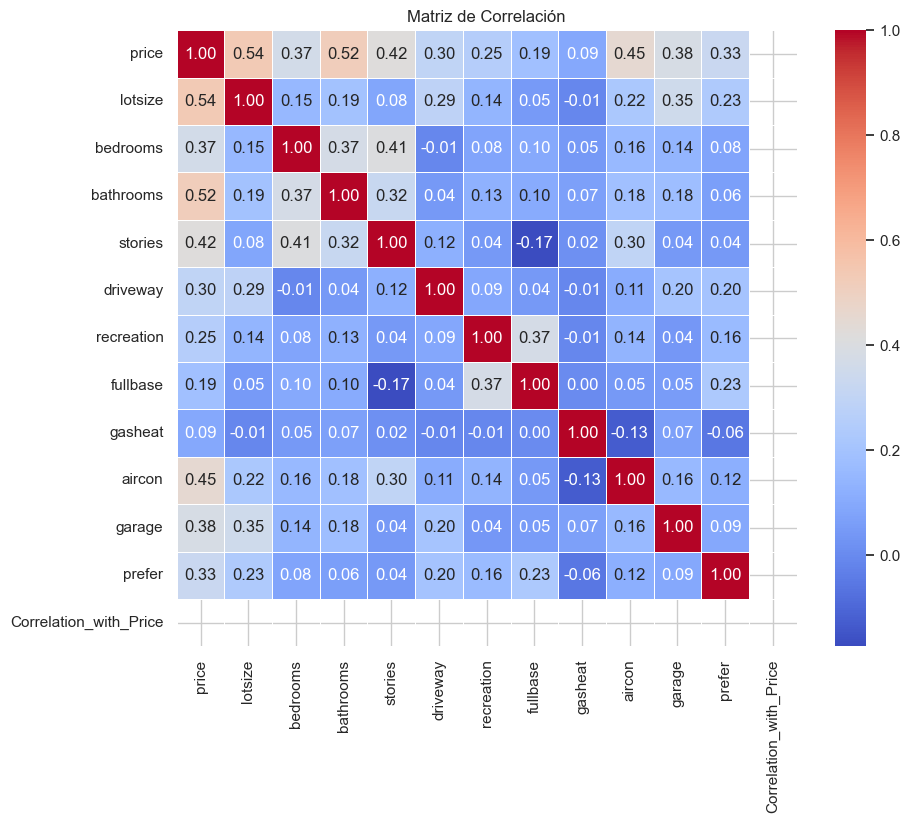

In [27]:

#Mostrar la intensidad de corretaciones de la matriz
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()

C:\Users\maria\AppData\Local\Temp\ipykernel_22348\2554174269.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation with Price', y='Variable', data=correlation_df, palette='viridis')


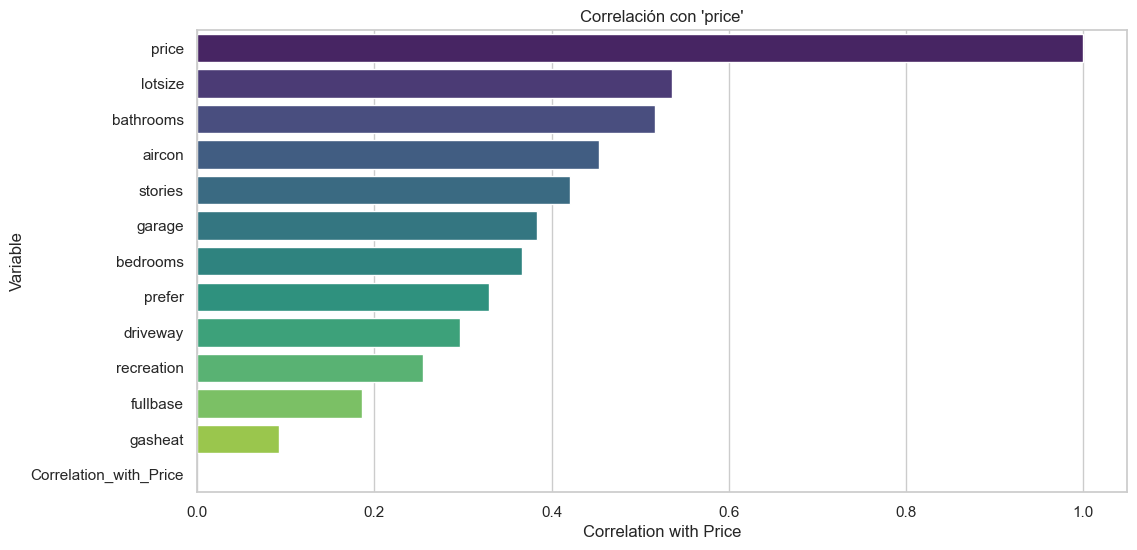

In [19]:
#Código obtenido de chat GPT#

import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la correlación entre 'price' y todas las demás variables
correlation_with_price = df.corr()['price'].abs().sort_values(ascending=False)

# Crear un DataFrame con la columna de correlación
correlation_df = pd.DataFrame({'Variable': correlation_with_price.index, 'Correlation with Price': correlation_with_price.values})

# Mostrar el DataFrame ordenado por la correlación con 'price' usando Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Correlation with Price', y='Variable', data=correlation_df, palette='viridis')
plt.title("Correlación con 'price'")
plt.show()


#Código obtenido de chat GPT#